# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
name2 = []
Cloud = []
Country = []
Date = []
Humid = []
Lat = []
Lng = []
Temp = []
Wind = []
recordcount = 0
setcount = 1


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

for city in cities:
    if recordcount==49:
        recordcount = 0
    else:
        recordcount = recordcount + 1
    if recordcount==0:
        setcount = setcount + 1 
    else:
        setcount = setcount + 0
    query_url = url + "appid=" + api_key + "&q=" + city +'&units=' + units
    response = requests.get(query_url).json()

    
    
    try:
        name = response['name']
        print('Processing Record ' + str(recordcount) + ' of Set ' + str(setcount)  + ' | ' + name)
        name2.append(response['name'])
        Cloud.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humid.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Temp.append(response['main']['temp_max'])
        Wind.append(response['wind']['speed'])
        
    except (KeyError):
        print("City not found. Skipping ...")
        name2.append('')
        Cloud.append('')
        Country.append('')
        Date.append('')
        Humid.append('')
        Lat.append('')
        Lng.append('')
        Temp.append('')
        Wind.append('')

print('Data Retrieval Complete')

Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Bambous Virieux
Processing Record 4 of Set 1 | Mahebourg
Processing Record 5 of Set 1 | Codrington
Processing Record 6 of Set 1 | Georgetown
City not found. Skipping ...
Processing Record 8 of Set 1 | Hithadhoo
Processing Record 9 of Set 1 | Yaransk
Processing Record 10 of Set 1 | Lekoni
Processing Record 11 of Set 1 | Punta Arenas
Processing Record 12 of Set 1 | Isangel
Processing Record 13 of Set 1 | Arraial do Cabo
Processing Record 14 of Set 1 | Conceicao da Barra
Processing Record 15 of Set 1 | Bluff
Processing Record 16 of Set 1 | Kahului
Processing Record 17 of Set 1 | San Patricio
Processing Record 18 of Set 1 | Mataura
Processing Record 19 of Set 1 | Hobart
Processing Record 20 of Set 1 | Rikitea
Processing Record 21 of Set 1 | Lebu
Processing Record 22 of Set 1 | Chuy
Processing Record 23 of Set 1 | Guarapari
Processing Record 24 of Set 1 | Vao
Processing Record 25 of

Processing Record 8 of Set 5 | Beckley
Processing Record 9 of Set 5 | Japura
Processing Record 10 of Set 5 | Quatre Cocos
Processing Record 11 of Set 5 | Presidencia Roque Saenz Pena
Processing Record 12 of Set 5 | Cagliari
Processing Record 13 of Set 5 | Methoni
Processing Record 14 of Set 5 | Valls
Processing Record 15 of Set 5 | Fortuna
Processing Record 16 of Set 5 | Tura
Processing Record 17 of Set 5 | Churapcha
Processing Record 18 of Set 5 | Upernavik
Processing Record 19 of Set 5 | Torbay
Processing Record 20 of Set 5 | Nome
Processing Record 21 of Set 5 | Golden
Processing Record 22 of Set 5 | Longyearbyen
Processing Record 23 of Set 5 | Baruun-Urt
Processing Record 24 of Set 5 | Ende
City not found. Skipping ...
Processing Record 26 of Set 5 | Saravan
Processing Record 27 of Set 5 | Iqaluit
Processing Record 28 of Set 5 | Turukhansk
Processing Record 29 of Set 5 | Terme
Processing Record 30 of Set 5 | Nova Olinda do Norte
Processing Record 31 of Set 5 | Hervey Bay
Processing 

Processing Record 13 of Set 9 | Aklavik
Processing Record 14 of Set 9 | Dapaong
Processing Record 15 of Set 9 | Barranca
Processing Record 16 of Set 9 | Fort-Shevchenko
Processing Record 17 of Set 9 | Manacor
Processing Record 18 of Set 9 | Anshun
City not found. Skipping ...
Processing Record 20 of Set 9 | Yeppoon
Processing Record 21 of Set 9 | Huicungo
Processing Record 22 of Set 9 | Acari
City not found. Skipping ...
City not found. Skipping ...
Processing Record 25 of Set 9 | Luis Correia
Processing Record 26 of Set 9 | Noumea
Processing Record 27 of Set 9 | Bogale
Processing Record 28 of Set 9 | Neyvo-Shaytanskiy
Processing Record 29 of Set 9 | Pitimbu
Processing Record 30 of Set 9 | Kolondieba
Processing Record 31 of Set 9 | Kathmandu
Processing Record 32 of Set 9 | Rock Sound
City not found. Skipping ...
Processing Record 34 of Set 9 | Yonezawa
Processing Record 35 of Set 9 | Williston
City not found. Skipping ...
Processing Record 37 of Set 9 | Kamenka
City not found. Skipping

In [4]:
wdf = pd.DataFrame({'City':name2,
                    'Cloudiness': Cloud,
                    'Country': Country,
                    'Date': Date,
                    'Humidity': Humid,
                    'Lat': Lat,
                    'Lng': Lng,
                    'Max Temp':Temp,
                    'Wind Speed':Wind
                     })
wdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,11,ZA,1555978570,84,-34.42,19.24,18.33,4.47
1,Ushuaia,40,AR,1555977600,70,-54.81,-68.31,7,9.8
2,Bambous Virieux,40,MU,1555979042,88,-20.34,57.76,25,2.6
3,Mahebourg,40,MU,1555979042,88,-20.41,57.7,25,2.6
4,Codrington,75,AU,1555979142,73,-28.95,153.24,25,1.5
5,Georgetown,20,GY,1555977600,74,6.8,-58.16,28,3.1
6,,,,,,,,,
7,Hithadhoo,92,MV,1555979216,79,-0.6,73.08,28.9,5.32
8,Yaransk,64,RU,1555979676,77,57.3,47.88,5.64,2.85
9,Lekoni,92,GA,1555979676,66,-1.58,14.26,24.86,0.4


In [5]:
wdf.to_csv('WeatherData.csv', index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
weatherdata = 'WeatherData.csv'
ogdata = pd.read_csv(weatherdata)
ogdata

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,11.0,ZA,1.555979e+09,84.0,-34.42,19.24,18.33,4.47
1,Ushuaia,40.0,AR,1.555978e+09,70.0,-54.81,-68.31,7.00,9.80
2,Bambous Virieux,40.0,MU,1.555979e+09,88.0,-20.34,57.76,25.00,2.60
3,Mahebourg,40.0,MU,1.555979e+09,88.0,-20.41,57.70,25.00,2.60
4,Codrington,75.0,AU,1.555979e+09,73.0,-28.95,153.24,25.00,1.50
5,Georgetown,20.0,GY,1.555978e+09,74.0,6.80,-58.16,28.00,3.10
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hithadhoo,92.0,MV,1.555979e+09,79.0,-0.60,73.08,28.90,5.32
8,Yaransk,64.0,RU,1.555980e+09,77.0,57.30,47.88,5.64,2.85
9,Lekoni,92.0,GA,1.555980e+09,66.0,-1.58,14.26,24.86,0.40


In [7]:
wdata = ogdata.dropna()
wdata

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,11.0,ZA,1.555979e+09,84.0,-34.42,19.24,18.33,4.47
1,Ushuaia,40.0,AR,1.555978e+09,70.0,-54.81,-68.31,7.00,9.80
2,Bambous Virieux,40.0,MU,1.555979e+09,88.0,-20.34,57.76,25.00,2.60
3,Mahebourg,40.0,MU,1.555979e+09,88.0,-20.41,57.70,25.00,2.60
4,Codrington,75.0,AU,1.555979e+09,73.0,-28.95,153.24,25.00,1.50
5,Georgetown,20.0,GY,1.555978e+09,74.0,6.80,-58.16,28.00,3.10
7,Hithadhoo,92.0,MV,1.555979e+09,79.0,-0.60,73.08,28.90,5.32
8,Yaransk,64.0,RU,1.555980e+09,77.0,57.30,47.88,5.64,2.85
9,Lekoni,92.0,GA,1.555980e+09,66.0,-1.58,14.26,24.86,0.40
10,Punta Arenas,75.0,CL,1.555979e+09,75.0,-53.16,-70.91,6.00,6.20


#### Latitude vs. Temperature Plot

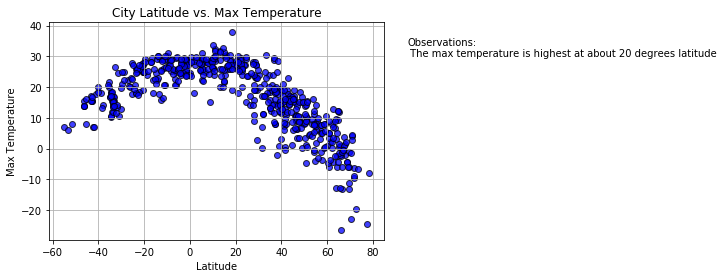

In [8]:
txaxis = wdata['Lat']
tyaxis = wdata['Max Temp']
tplot = plt.scatter(txaxis, tyaxis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

title = plt.title('City Latitude vs. Max Temperature')
ylabel = plt.ylabel('Max Temperature')
xlabel = plt.xlabel('Latitude')
plt.grid()

textbox = 'Observations:\n The max temperature is highest at about 20 degrees latitude'
plt.text(95, 30, textbox, fontsize=10)
plt.savefig('Max Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

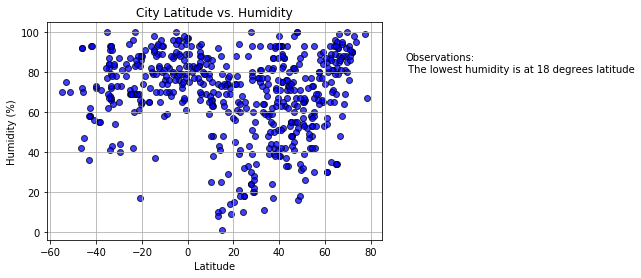

In [11]:
hxaxis = wdata['Lat']
hyaxis = wdata['Humidity']
hplot = plt.scatter(hxaxis, hyaxis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

title = plt.title('City Latitude vs. Humidity')
ylabel = plt.ylabel('Humidity (%)')
xlabel = plt.xlabel('Latitude')
plt.grid()

textbox = 'Observations:\n The lowest humidity is at 18 degrees latitude'
plt.text(95, 80, textbox, fontsize=10)
plt.savefig('Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

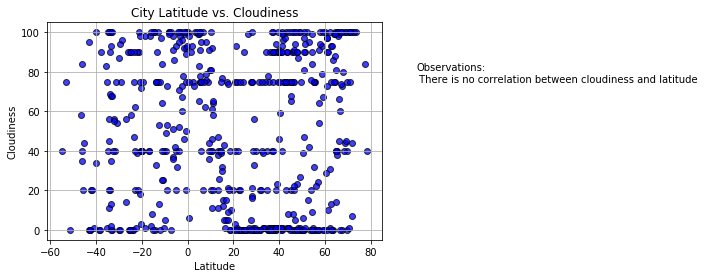

In [12]:
cxaxis = wdata['Lat']
cyaxis = wdata['Cloudiness']
cplot = plt.scatter(cxaxis, cyaxis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

title = plt.title('City Latitude vs. Cloudiness')
ylabel = plt.ylabel('Cloudiness')
xlabel = plt.xlabel('Latitude')
plt.grid()

textbox = 'Observations:\n There is no correlation between cloudiness and latitude'
plt.text(100, 75, textbox, fontsize=10)
plt.savefig('Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

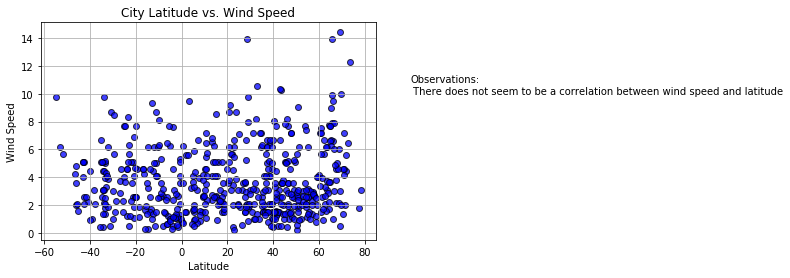

In [13]:
wxaxis = wdata['Lat']
wyaxis = wdata['Wind Speed']
wplot = plt.scatter(wxaxis, wyaxis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

title = plt.title('City Latitude vs. Wind Speed')
ylabel = plt.ylabel('Wind Speed')
xlabel = plt.xlabel('Latitude')
plt.grid()

textbox = 'Observations:\n There does not seem to be a correlation between wind speed and latitude'
plt.text(100, 10, textbox, fontsize=10)
plt.savefig('WindSpeed.png')
plt.show()